<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Temperature Prediction** 
Using Gradient Boosting Algorithm
Gradient Boosting in incredibly effective in practice. Although, in this challenge, gradient boosting can be used as a regression model, it’s also very effective as a classification and ranking model. As long as you have a differentiable loss function for the algorithm to minimize, you’re good to go. Boosting employs the logic in which the subsequent predictors learn from the mistakes of the previous predictors. And hence, gradient boosting produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

An assumption of linear regression is that sum of its residuals is 0. Now we can think of these residuals as errors produced by our prediction model and if we can see some pattern of residuals around 0, we can utilise that pattern to fit a more accurate model.

Approach
Understanding the approach using the concept of gradient descent, consider a differentiable function we want to minimize, for instance:

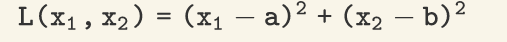
The goal here is to find 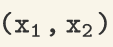 such that it fits/minimises the function .

In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

month = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

n = int(raw_input())
raw_input()

lines = [raw_input().split() for i in range(n)]
for i in [2, 3]:
    x, y, xx = [], [], []
    for t in lines:
        yy = int(t[0])
        mm = [0]*12
        mm[month[t[1]]-1] = 1
        
        if t[5-i][0] != 'M':
            xl = mm+[yy*12+month[t[1]]-1, float(t[5-i])]
            
        if t[2][0] != 'M' and t[3][0] != 'M':
            x.append(xl)
            y.append(float(t[i]))
            
        if t[i][0] == 'M':
       	# xx contains the missing values
            xx.append(xl)
            
    gbr = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.0018)
    gbr.fit(x, y)
    yy = gbr.predict(xx)
    if i == 2:
        maxp = yy
    else:
        minp = yy
        

NameError: name 'raw_input' is not defined

In [1]:
#LEARNER'S SOLUTION

import numpy as np
import pandas as pd

n = int(input())
colnames = list(input().strip().split())

l1 = []
l2 = []
for i in range(0, n):
    x = list(input().strip().split())
    l1.append(x[2])
    l2.append(x[3])

ll1 = [np.nan if 'Missing' in i else float(i) for i in l1]

int1 = pd.Series(ll1).interpolate(method='cubic', order=2)

ll2 = [np.nan if 'Missing' in i else float(i) for i in l2]

int2 = pd.Series(ll2).interpolate(method='cubic', order=2)
   
res = pd.DataFrame({'item':np.array(l1)[np.array(['Missing' in i for i in l1])], 'value':list(int1[['Missing' in i for i in l1]])})
res = res.append(pd.DataFrame({'item':np.array(l2)[np.array(['Missing' in i for i in l2])], 'value':list(int2[['Missing' in i for i in l2]])}))
res1 = pd.DataFrame({'index':list(res.item.apply(lambda x: int(x.split('_')[1]))), 'value':res.value})
res1 = res1.sort_values(by=['index'])
x = res1.value.tolist()

for i in range(0, len(x)):
    print("%.2f" % x[i])
    

2
2
3


IndexError: list index out of range